In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('data.csv')
df.head(10)

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1
5,Engineering Sciences,No,19,Male,Yes,Yes,3,3,3,3,3,3,3,No,Positivity,NaN,1
6,Engineering Sciences,Yes,19,Male,Yes,Yes,3,2,3,3,4,1,1,No,Work Ethic,NaN,1
7,Engineering Sciences,No,20,Male,Yes,Yes,4,2,4,4,5,3,4,Yes,Work Ethic,Just not interested! (Want to work in the corp...,0
8,Others,Yes,20,Male,Yes,Yes,2,3,3,1,2,2,2,No,Passion,"Academic Pressure, Lack of Knowledge, Not able...",0
9,Engineering Sciences,Yes,17,Male,Yes,Yes,2,3,2,1,4,3,3,Yes,Work Ethic,NaN,1


In [3]:
#checking categorical values
for i in df.columns:
    
    if df[i].dtype not in ['int64', 'float64']:
        print(f"{i} : {df[i].unique()}")

EducationSector : ['Engineering Sciences' 'Others'
 'Economic Sciences, Business Studies, Commerce and Law'
 'Art, Music or Design' 'Humanities and Social Sciences'
 'Medicine, Health Sciences' 'Teaching Degree (e.g., B.Ed)'
 'Mathematics or Natural Sciences' 'Language and Cultural Studies']
IndividualProject : ['No' 'Yes']
Gender : ['Male' 'Female']
City : ['Yes' 'No']
Influenced : ['No' 'Yes']
MentalDisorder : ['Yes' 'No']
KeyTraits : ['Passion' 'Vision' 'Resilience' 'Positivity' 'Work Ethic']
ReasonsForLack : [nan
 'Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else)'
 'Not willing to start a venture in India and waiting for future relocation'
 'Not able to take a Financial Risk'
 'Just not interested! (Want to work in the corporate sector, or for the government or pursue research or something else), Academic Pressure, Lack of Knowledge, Not able to take a Financial Risk'
 'Academic Pressure, Lack of Knowledge, Not 

In [4]:
encode_dummies = ['IndividualProject', 'Gender', 'City','Influenced', 'MentalDisorder']
encode_label = ['EducationSector', 'KeyTraits']
df_new = pd.get_dummies(df, columns = encode_dummies)

In [5]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()    
df_new['EducationSector'] = le.fit_transform(df_new['EducationSector'])
df_new['KeyTraits'] = le.fit_transform(df_new['KeyTraits'])

In [6]:
df_new.head()

,EducationSector,Age,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,KeyTraits,...,IndividualProject_No,IndividualProject_Yes,Gender_Female,Gender_Male,City_No,City_Yes,Influenced_No,Influenced_Yes,MentalDisorder_No,MentalDisorder_Yes
0,2,19,2,2,3,3,2,2,3,0,...,1,0,0,1,0,1,1,0,0,1
1,2,22,3,3,3,4,4,3,4,3,...,0,1,0,1,1,0,0,1,0,1
2,2,18,3,4,3,3,3,4,4,0,...,1,0,0,1,0,1,1,0,1,0
3,2,20,3,3,3,3,4,3,3,2,...,0,1,0,1,0,1,0,1,1,0
4,2,19,2,3,3,3,4,3,2,3,...,0,1,0,1,0,1,0,1,0,1


In [7]:
df_new['EducationSector'].value_counts()

2    123
1     32
0     21
7     20
6     10
3      5
5      4
8      3
4      1
Name: EducationSector, dtype: int64

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EducationSector         219 non-null    int64 
 1   Age                     219 non-null    int64 
 2   Perseverance            219 non-null    int64 
 3   DesireToTakeInitiative  219 non-null    int64 
 4   Competitiveness         219 non-null    int64 
 5   SelfReliance            219 non-null    int64 
 6   StrongNeedToAchieve     219 non-null    int64 
 7   SelfConfidence          219 non-null    int64 
 8   GoodPhysicalHealth      219 non-null    int64 
 9   KeyTraits               219 non-null    int64 
 10  ReasonsForLack          128 non-null    object
 11  y                       219 non-null    int64 
 12  IndividualProject_No    219 non-null    uint8 
 13  IndividualProject_Yes   219 non-null    uint8 
 14  Gender_Female           219 non-null    uint8 
 15  Gender

In [10]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
stopwords = set(stopwords.words('english'))
import string

df2 = df_new[['ReasonsForLack']]
df2 = df2.dropna()

print(stopwords)

[nltk_data] Downloading package stopwords to /home/habib/nltk_data...


{'are', 'both', 'itself', 'hadn', "you'll", "haven't", 'his', 'until', 'out', "wouldn't", 'haven', "hasn't", 'has', "shouldn't", "weren't", 'she', 'it', 'you', 'yours', 'or', 'of', 'ours', 'them', 'into', 'other', 'd', 'o', "didn't", 'very', 'don', 'on', "shan't", 'himself', 'having', 'further', 'here', 'up', 'did', 'these', 'once', 'weren', 'how', 'this', 'most', 'won', 'yourself', 'because', 'its', 'now', 'my', 'll', 'ain', 'wasn', 'and', 'can', 'who', "don't", 'those', 'above', "she's", 'own', 'am', 'hasn', 'mightn', 'ma', "mightn't", 'their', 'few', 'that', 'shouldn', 'is', 'should', "doesn't", 'over', "mustn't", 'myself', "hadn't", 'be', 'our', 'such', 'but', 'any', "should've", 'before', 'will', 'been', 'which', 'doing', 'hers', 'had', 'yourselves', 'herself', 'have', 'about', 'again', 'each', 'wouldn', "aren't", "isn't", 's', 'shan', 'then', 'y', 'than', 'were', "that'll", 'below', 'a', 'more', 'whom', 'so', 'him', 'when', 'not', 'me', 'i', 'couldn', 'off', 'if', 'was', 'in', 'a

[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
df2['ReasonsForLack'] = df2['ReasonsForLack'].str.lower().str.split()
df2['ReasonsForLack'] =df2['ReasonsForLack'].apply(lambda x: [item for item in x if item not in stopwords])
df2['ReasonsForLack'] = df2['ReasonsForLack'].apply(lambda x : [item.translate(str.maketrans('', '', string.punctuation)) for item in x])

In [13]:
df2['ReasonsForLack']

1      [interested, want, work, corporate, sector, go...
2      [willing, start, venture, india, waiting, futu...
3                          [able, take, financial, risk]
7      [interested, want, work, corporate, sector, go...
8      [academic, pressure, lack, knowledge, able, ta...
                             ...                        
206    [interested, want, work, corporate, sector, go...
209                     [lack, knowledge, mental, block]
213    [interested, want, work, corporate, sector, go...
215    [interested, want, work, corporate, sector, go...
217                                    [lack, knowledge]
Name: ReasonsForLack, Length: 128, dtype: object

In [14]:
df2explode=pd.DataFrame(df2['ReasonsForLack'].explode())
df2explode

,ReasonsForLack
1,interested
1,want
1,work
1,corporate
1,sector
...,...
215,else
215,academic
215,pressure
217,lack


In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [17]:
df2explode.value_counts()

ReasonsForLack
work              63
pursue            63
want              63
corporate         63
else              63
something         63
sector            63
government        63
research          63
interested        63
pressure          50
risk              49
take              49
lack              44
knowledge         44
academic          36
financial         33
able              33
india             18
relocation        18
future            18
start             18
venture           18
waiting           18
willing           18
unwillingness     16
parental          14
mental             9
block              9
dtype: int64

In [18]:
df2wordcount=pd.DataFrame(df2explode.groupby('ReasonsForLack')['ReasonsForLack'].count().sort_values(ascending=False))

In [19]:
df2wordcount=df2wordcount.rename(columns={'ReasonsForLack': 'count'})
df2wordcount.index = df2wordcount.index.rename('Word')

In [20]:
df2wordcount =df2wordcount.reset_index()
df2wordcount

,Word,count
0,work,63
1,pursue,63
2,want,63
3,corporate,63
4,else,63
5,something,63
6,sector,63
7,government,63
8,research,63
9,interested,63


<AxesSubplot:xlabel='Word'>

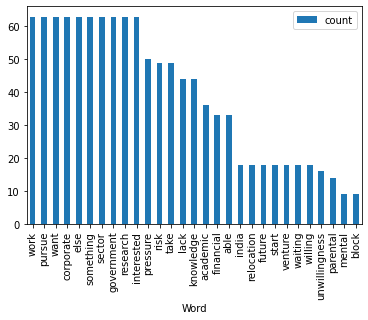

In [21]:
df2wordcount.plot.bar(x='Word')

<AxesSubplot:xlabel='count', ylabel='Word'>

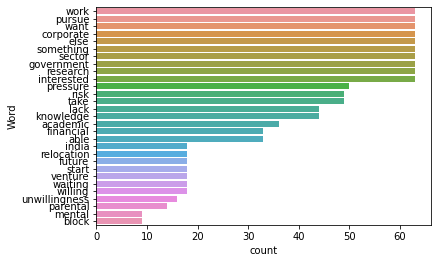

In [22]:
import seaborn as sns
sns.barplot(y = 'Word', x = 'count', data = df2wordcount)

In [23]:
df_new.columns

Index(['EducationSector', 'Age', 'Perseverance', 'DesireToTakeInitiative',
       'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve',
       'SelfConfidence', 'GoodPhysicalHealth', 'KeyTraits', 'ReasonsForLack',
       'y', 'IndividualProject_No', 'IndividualProject_Yes', 'Gender_Female',
       'Gender_Male', 'City_No', 'City_Yes', 'Influenced_No', 'Influenced_Yes',
       'MentalDisorder_No', 'MentalDisorder_Yes'],
      dtype='object')

In [24]:
df_new = df_new.drop("ReasonsForLack", axis = 1)

In [25]:
df_new.corr().abs()['y'].sort_values(ascending = False)

y                         1.000000
Influenced_Yes            0.255204
Influenced_No             0.255204
IndividualProject_Yes     0.121054
IndividualProject_No      0.121054
GoodPhysicalHealth        0.108800
DesireToTakeInitiative    0.092578
SelfConfidence            0.088249
SelfReliance              0.082386
Gender_Female             0.077813
Gender_Male               0.077813
StrongNeedToAchieve       0.075438
City_No                   0.073973
City_Yes                  0.073973
KeyTraits                 0.068260
Competitiveness           0.028401
Perseverance              0.028037
Age                       0.018444
MentalDisorder_Yes        0.008280
MentalDisorder_No         0.008280
EducationSector           0.003692
Name: y, dtype: float64

In [26]:
df_new['y'].value_counts()

0    128
1     91
Name: y, dtype: int64

In [27]:
zero  = df_new[df_new['y']==0]
one = df_new[df_new['y']==1]
from sklearn.utils import resample
df_minority_upsampled = resample(one, replace = True, n_samples = 128)
df_new = pd.concat([zero, df_minority_upsampled])

from sklearn.utils import shuffle
df_new = shuffle(df_new)

In [28]:
df_new['y'].value_counts()

0    128
1    128
Name: y, dtype: int64

In [29]:
X = df_new.drop(['y'], axis =1)
Y = df_new['y']

In [32]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [34]:
model = XGBClassifier(learning_rate =0.9, n_estimators = 1500,seed=27)
model.fit(X_train, y_train)
pred = model.predict(X_test)

/home/habib/notebook_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [35]:
accuracy_score(y_test,pred)

0.8653846153846154

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        26
           1       0.79      1.00      0.88        26

    accuracy                           0.87        52
   macro avg       0.89      0.87      0.86        52
weighted avg       0.89      0.87      0.86        52

